In [18]:
# Description: This program use Convolutional Neural Networks(CNN)
#              classify handwritten digits as number 0-9

In [19]:
#importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


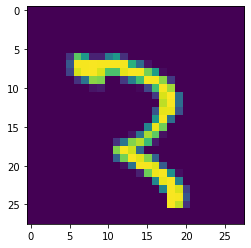

In [22]:
plt.imshow(X_train[500])

In [23]:
# Reshaping the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [24]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
hist = model.fit(X_train,y_train_one_hot, validation_split = .2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 106s 70ms/step - loss: 0.2872 - accuracy: 0.9458 - val_loss: 0.0801 - val_accuracy: 0.9753
Epoch 2/10
1500/1500 [==============================] - 86s 57ms/step - loss: 0.0731 - accuracy: 0.9782 - val_loss: 0.0795 - val_accuracy: 0.9778
Epoch 3/10
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0572 - accuracy: 0.9825 - val_loss: 0.0696 - val_accuracy: 0.9807
Epoch 4/10
1500/1500 [==============================] - 85s 57ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0701 - val_accuracy: 0.9819
Epoch 5/10
1500/1500 [==============================] - 94s 63ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0802 - val_accuracy: 0.9802
Epoch 6/10
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0926 - val_accuracy: 0.9816
Epoch 7/10
 850/1500 [================>.............] - ETA: 37s - loss: 0.0270 - accuracy: 0.9908

In [11]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 4s 14ms/step


array([[1.2733564e-17, 1.9527523e-21, 1.6246415e-14, ..., 1.0000000e+00,
        1.2678557e-16, 5.5029755e-13],
       [2.4695571e-12, 4.5471083e-08, 9.9999976e-01, ..., 1.4109492e-19,
        8.1531684e-13, 1.1684810e-22],
       [7.1646280e-19, 1.0000000e+00, 1.5146733e-14, ..., 1.6391898e-14,
        2.2270796e-12, 1.2706930e-16],
       ...,
       [6.0497378e-29, 1.6522139e-17, 1.1897521e-21, ..., 1.6293788e-12,
        3.9168243e-13, 5.3390707e-17],
       [7.0794959e-23, 1.0217512e-24, 1.5287115e-26, ..., 6.5155960e-23,
        8.6418415e-16, 5.3673974e-16],
       [1.6926196e-19, 3.0127519e-26, 2.8049475e-20, ..., 1.1866107e-29,
        1.5742066e-21, 9.2034331e-25]], dtype=float32)

In [13]:
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix

In [5]:
score = model.mean_absolute_error(y_test, y_pred)
print('Model Accuracy:', score)

NameError: name 'model' is not defined